In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")

df
#Veri setinde boşluk yok ayrıca kategorik verilerin hepside numerik olarak sınıflandırılmış  , örneğin chestpain:Cp 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [32]:
print("Eksik Değerler:")
print(df.isnull().sum())
#Eksik değer yok
df.dtypes

Eksik Değerler:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [33]:
df.to_csv("heart_2.csv",index=False)

In [34]:
X = df.drop(columns=["target"])  #Girdi matrixi
y = df["target"] # Çıktı vektörü

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
model_1 = DecisionTreeRegressor(max_depth=5, random_state=42)
model_1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [23]:
y_pred = model_1.predict(X_test)

In [63]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

mae ,mse,r2
#Veride boşluk olmadığı için mi mae ve mse bu kdar düşük çıktı ??
#Yoksa target sadece 2 değer aldığı için mi?

(np.float64(0.26683680169007956),
 np.float64(0.1162707199288001),
 0.5337894947682488)

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

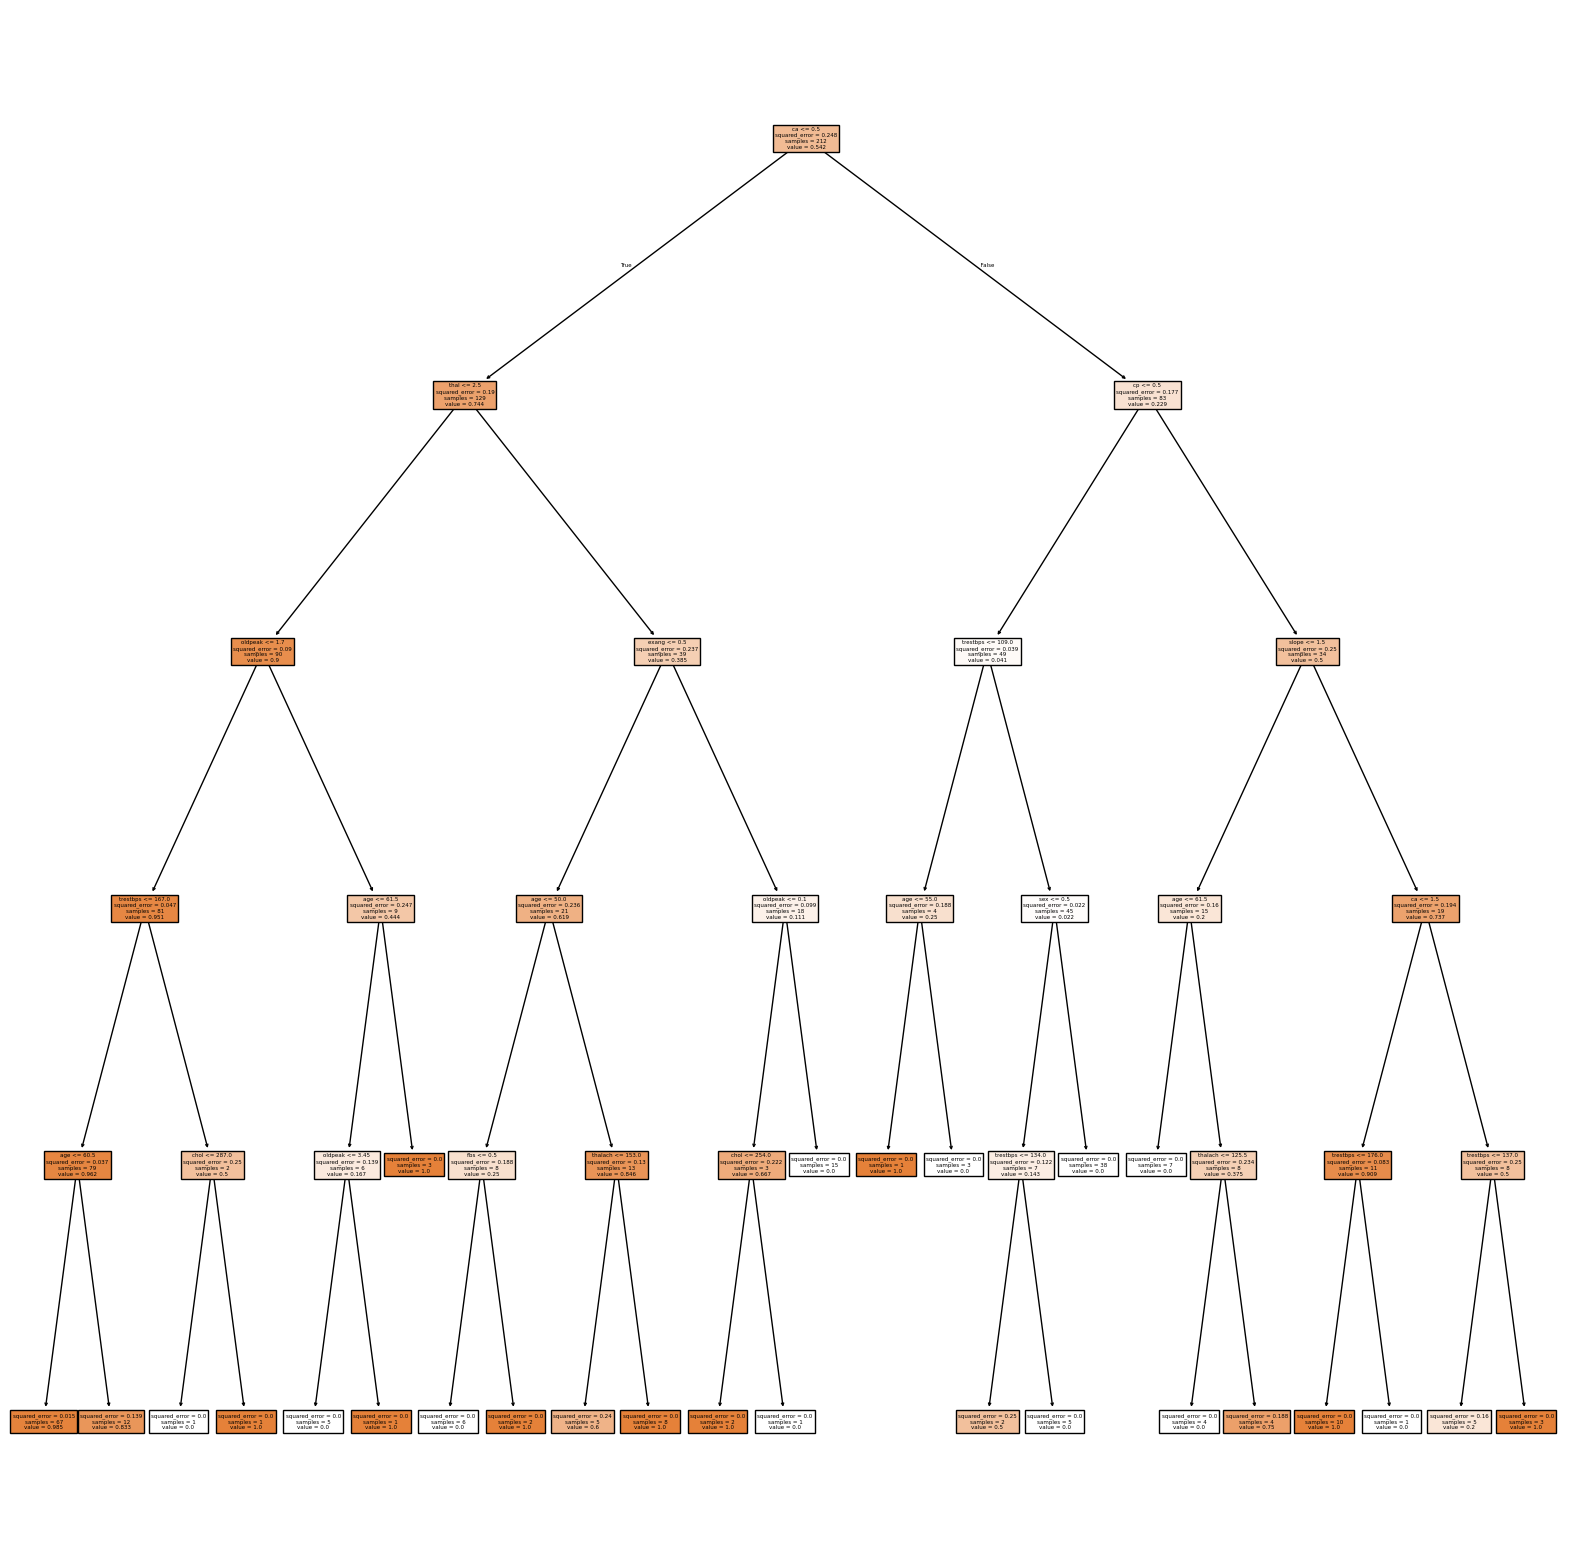

In [27]:
plt.figure(figsize=(20,20))
plot_tree(model_1, feature_names=X.columns,filled=True)
plt.show()


In [35]:
print("-----------------------------------------------")

-----------------------------------------------


In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
model2 = RandomForestRegressor(n_estimators=5, max_depth=5, random_state=42)
model2.fit(X_train,y_train)
#42 STANDARTİZE UNUTMA!

RandomForestRegressor(max_depth=5, n_estimators=5, random_state=42)

In [38]:
y_pred2 = model2.predict(X_test)

In [42]:
r2 = r2_score(y_test, y_pred2)

r2
#Değer 0,4  mantıklı bir analizden uzak?


0.4016583369258141

plt.figure(figsize=(40,40))
plot_tree(model2)
plt.show()
Bunu böyle kullanıp random foresti görselleştiremeyiz çünkü plot_tree tek bir karar ağacını görselleştirirken RFR da birden fazla karar ağacı mekanizması oluşur


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
model3 = pd.read_csv('heart.csv')


In [54]:
X = model3.drop('target',axis = 1) 
y = model3['target']  
# Axis 1  yazılmadığında hata verdi chatgpt ile düzelttim. ?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [58]:
y_pred = model.predict(X_test_scaled)

In [61]:
mse = mean_squared_error(y_test, y_pred)
r3 = r2_score(y_test, y_pred)
mse,r3

(np.float64(0.1162707199288001), 0.5337894947682488)

In [62]:
sample_patient = X_test_scaled[0:1]  # Take the first test patient
prediction = model.predict(sample_patient)
print(f"\nSample prediction (scaled features): {prediction[0]:.4f}")
print(f"Actual value: {y_test.iloc[0]}")


Sample prediction (scaled features): 0.2046
Actual value: 0
